# Import Libraries

In [68]:
import numpy as np 
import pandas as pd
import os
import re
import cv2
import time
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from tqdm import tqdm

# Dataset Path

In [69]:
PATH="../input/final-final-dataset/dataset"
image_height=128
image_width=64
data=[]
labels=[]

In [70]:
t1=time.time()

# Read Dataset

In [71]:
for dirname,_, filenames in tqdm(os.walk(PATH)):
    for filename in filenames:
        image = cv2.imread(os.path.join(dirname, filename))
        image= cv2.resize(image ,(image_width,image_height))
        labels.append(dirname.split("/")[-1])
        data.append(image)

153it [00:06, 24.15it/s]


# Visualize Dataset

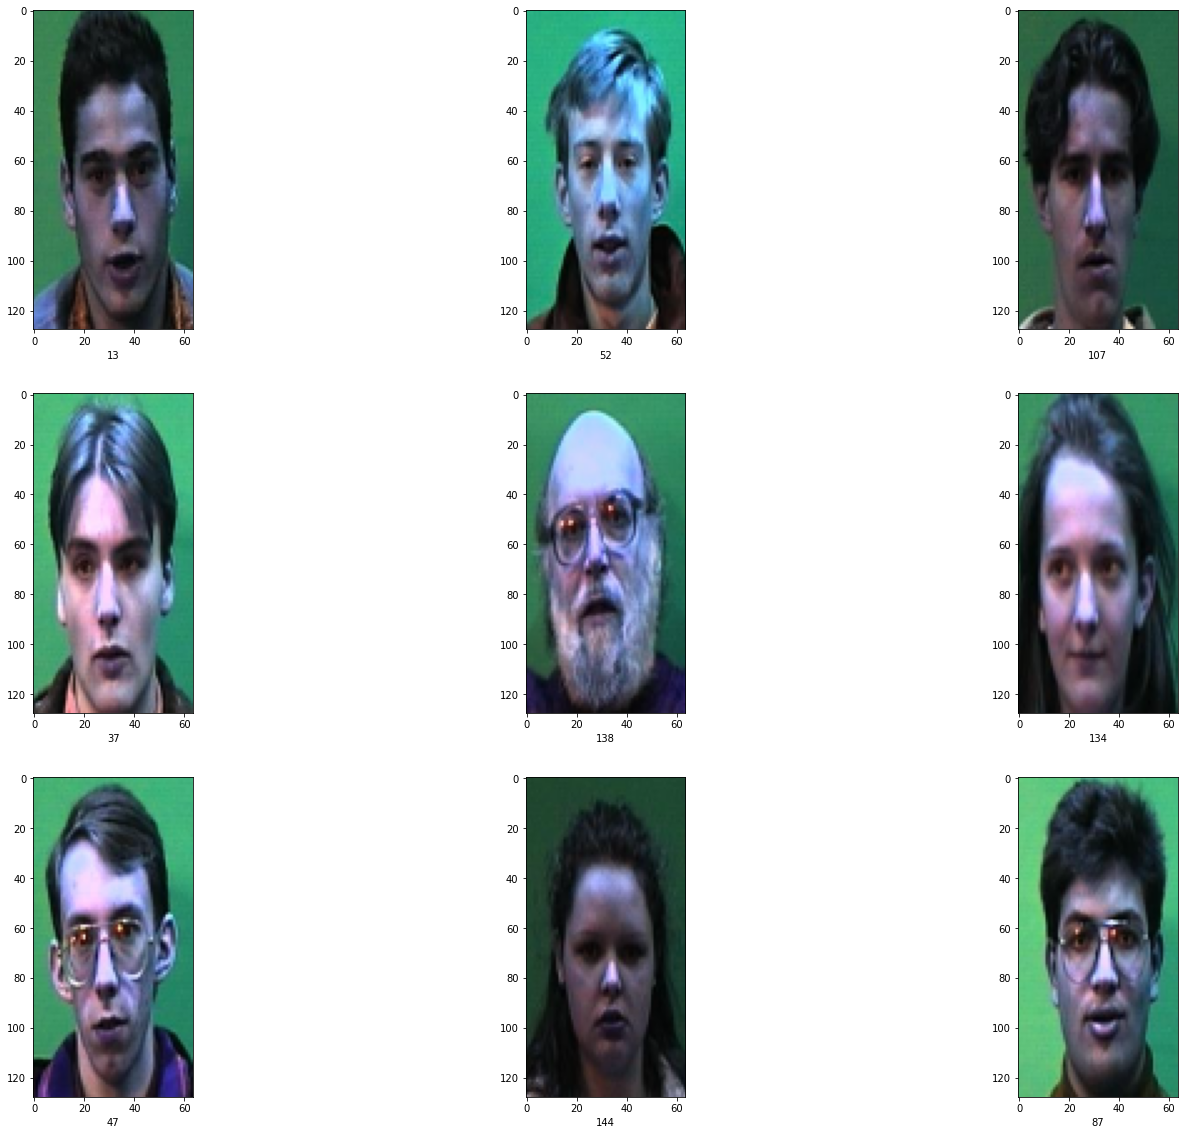

In [72]:
fig = plt.figure(figsize=(25,20))
for i in range(1,10):
    index = random.randint(0,3019) #https://www.pythoncentral.io/how-to-generate-a-random-number-in-python/
    plt.subplot(3,3,i)
    plt.imshow(data[index])
    plt.xlabel(labels[index].split("_")[0])
plt.show()

# Label Encoder

In [73]:
label_encoder = LabelEncoder()
Labels= label_encoder.fit_transform(labels)

# BGR to GrayScale Conversion

In [74]:
gray_scale_image = [cv2.cvtColor(data[i] , cv2.COLOR_BGR2GRAY) for i in range(len(data))]

# GrayScale Visualization

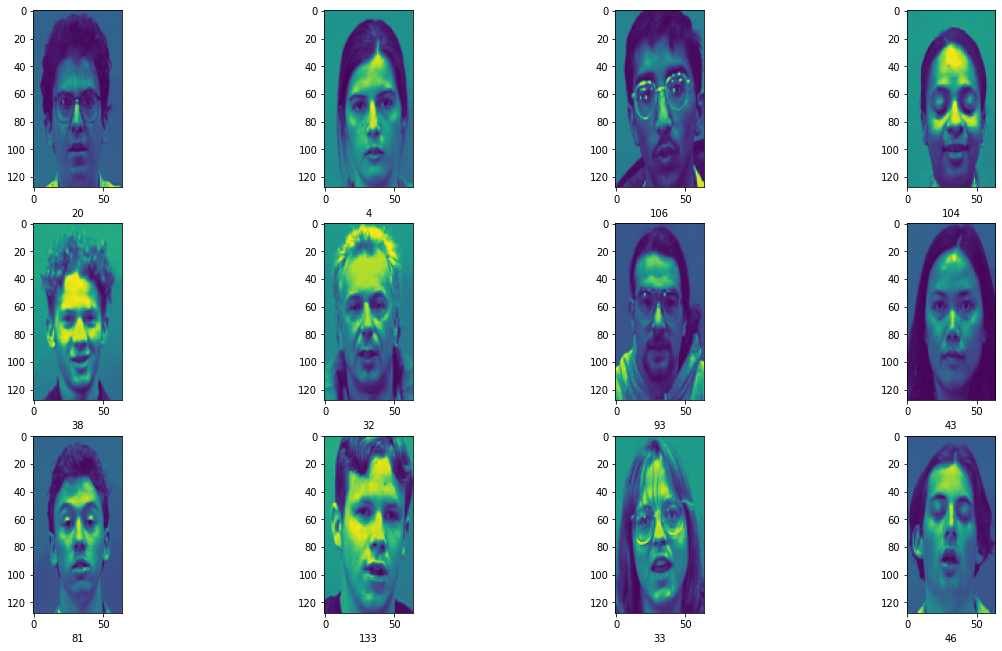

In [75]:
fig = plt.figure(figsize=(20,15))
for i in range(1,13):
    index = random.randint(1,3019) 
    plt.subplot(4,4,i)
    plt.imshow(gray_scale_image[index])
    plt.xlabel(Labels[index])
plt.show()

In [76]:
Labels = np.array(Labels).reshape(len(Labels),1)

# HOG Descriptor

In [77]:
pixels_per_cell =8
cell_per_block=4
hog_features=[]
hog_image=[]
for image in tqdm(gray_scale_image):
    fd , hog_im = hog(image , orientations=9 , pixels_per_cell=(pixels_per_cell , pixels_per_cell) , block_norm='L2' , cells_per_block=(cell_per_block,cell_per_block) , visualize=True)
    hog_image.append(hog_im)
    hog_features.append(fd)

100%|██████████| 3040/3040 [01:46<00:00, 28.43it/s]


# Visualizing The Edges

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


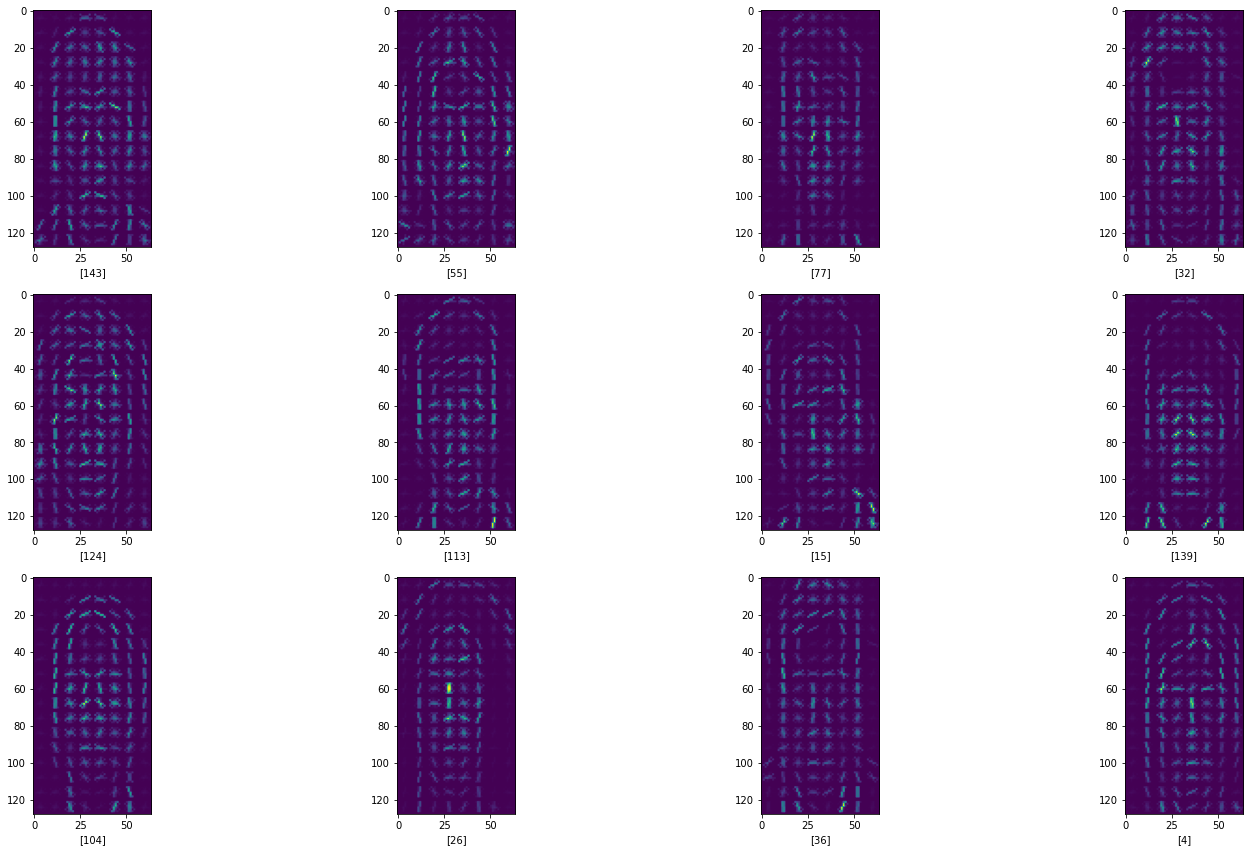

In [78]:
fig = plt.figure(figsize=(25,20))
for i in range(1,13):
    index = random.randint(1,2000)
    plt.subplot(4,4,i)
    plt.imshow(hog_image[index])
    plt.xlabel(Labels[index])
plt.show()

In [79]:
hog_features = np.array(hog_features)
df = np.hstack((hog_features,Labels))

In [80]:
from sklearn.model_selection import train_test_split , GridSearchCV

# Train Test Split

In [81]:
X_train , X_test , Y_train , Y_test = train_test_split(df[:,:-1] ,df[:,-1],test_size=0.1,random_state=0, stratify=df[:,-1])

In [82]:
from sklearn.svm import SVC

# Training

In [83]:
t3=time.time()
svc = SVC(kernel='rbf' , class_weight='balanced' , C=1000 , gamma=0.0082)
svc.fit(X_train , Y_train)
print(svc.score(X_test , Y_test))
print("Time taken:  %0.3fs" % (time.time() - t3))

1.0
Time taken:  131.481s


In [84]:
y_pred= svc.predict(X_test)

# Evaluation

In [85]:
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [86]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00         2
        14.0       1.00      1.00      1.00         2
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         2
        17.0       1.00    

# Principal Component Analysis

In [87]:
from sklearn.decomposition import PCA
t= time.time()
pca = PCA(n_components=150 , svd_solver='randomized' , whiten=True).fit(X_train)
print("Time Taken", time.time()-t)

Time Taken 3.0673162937164307


In [88]:
t0 = time.time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Time Taken:  %0.3fs" % (time.time() - t0))

Time Taken:  0.232s


In [89]:
print("Total Time: ", (time.time()-t1))

Total Time:  265.13460969924927


In [90]:
from sklearn.metrics import classification_report

# Training After Dimensionality Reduction


https://www.sciencedirect.com/science/article/pii/S1877050910003388

In [91]:
t3=time.time()
svc = SVC(kernel='rbf' , class_weight='balanced' , C=1000 , gamma=0.0082)
svc.fit(X_train_pca , Y_train)
print(svc.score(X_test_pca , Y_test))
print("Time Taken:  %0.3fs" % (time.time() - t3))

1.0
Time Taken:  3.345s


In [92]:
y_pred= svm.predict(X_test_pca)

#print(classification_report(X_test_pca, Y_test))

# Model Evaluation

In [93]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00         2
        14.0       1.00      1.00      1.00         2
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         2
        17.0       1.00    

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
print(confusion_matrix(Y_test, y_pred))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
